 The word associations are scraped from the following sources:

AC : AspiesCentral (https://www.autismforums.com/forums/)

BC : BleepingComputer (https://www.bleepingcomputer.com/forums/)

CC : ClassicComics (https://classiccomics.org/)

ECF : E-CigaretteForum (https://www.e-cigarette-forum.com/)

GOG : Online game store (https://www.gog.com/forum)

LEF : Learn English Forum (https://learnenglish.vanillacommunity.com)

SAS : Social Anxiety Support (https://www.socialanxietysupport.com/forum/)

TF : The Fishy (https://forum.thefishy.co.uk/)

U2 : @U2 Forum (https://forum.atu2.com/)

WP : Wrong Planet (https://wrongplanet.net/forums/)

Most data is (American) English and includes post from people from many different countries.
LEF is a forum for people who want to learn English and therefore word associations from this source
could contain more mistakes. Data from TF contains British English, since this is a forum for British football supporters. 
AC and WP are internet forums for people with autism, which might also effect the type of word associations.

Number of word association from each source:

In [4]:
path="E:\\Datasets\wordgame.csv"

import pandas as pd
import numpy as np

data=pd.read_csv(path)

In [5]:
data

,author,word1,word2,source,sourceID
0,6204,"Hmm... ""Let them eat cake""\n, \n, Link! , , \...",^^^^^ fail (too much extra chit chat didnt kno...,WP,9
1,1765,Haircut.,Scalp,GOG,4
2,3569,inflamed,Fire,SAS,6
3,1329,symptoms,goody,GOG,4
4,4800,that hold me inside,I want to reach out.............,U2,8
...,...,...,...,...,...
342262,2756,Ireland,beautiful,SAS,6
342263,5614,infrared,Remote control.,WP,9
342264,2747,his,theirs,SAS,6
342265,659,Earth!!!!!!,Moon,BC,1


# Data cleaning

In [6]:
# creating a function to clean the data

In [7]:
def cleaner(d):
    # replace - things should be replaced 
    
    d.replace("\n"," ")          # replacing "\n" with spaces
    d.replace("`"," ")
    d.replace("$"," ")            # since we only needs words here we are also replacing the $ sign
    
    
    #remove - things should be removed
    
    for symbol in ["_","~","^","xd"]:
        d=d.replace(symbol," ")
        
        
 #   if d.find("said:")>1:         # if the word "find" appears more than once we are removing it
      #  return " "
    
   
    # remove everything following
    
    for symbol in ["quote:","sent from my","edited by","posted via",
                   "/","(",",","*","\u00a0","--","*",'"',".","!","?",
                   "=","[","{",":",";",">","<"]:
        
        d.replace(symbol," ")
    
    
     
    #remove leading characters
    
    for symbol in ["+","-","&","'"," ","!","."]:
        
        d=d.replace(symbol," ")
        
    #remove leading characters
    
    for symbol in ["-m", "'", " ", "\u00a0"]:
        
        d=d.replace(symbol," ")
    return d

In [8]:
# convert word columns to string

data["word1"]=data["word1"].astype(str)
data["word2"]=data["word2"].astype(str)

In [9]:
# delete all words containing non-ascii characters

data['word1'] = data['word1'].apply(lambda d: bytes(d, 'utf-8').decode('ascii','ignore'))
data['word2'] = data['word2'].apply(lambda d: bytes(d, 'utf-8').decode('ascii','ignore'))


In [10]:
#converting all to lowercase

data["word1"]=data["word1"].apply(lambda d:d.lower())
data["word2"]=data["word2"].apply(lambda d:d.lower())

In [11]:
# cleaning data


data["word1"]=data["word1"].apply(lambda d:cleaner(d))
data["word2"]=data["word2"].apply(lambda d:cleaner(d))

In [12]:
# replace empty word with np.NaN

data=data.replace(" ",np.nan)

In [13]:
# dropping all elements containing NaN values

data=data.dropna(axis=0,how="any").reset_index(drop=True)

In [14]:
# cut off all data longer than 25 characters, since words are rarely longer 

data["word1"]=data["word1"].apply(lambda d:d[:25] if len(d)>20 else d)
data["word2"]=data["word2"].apply(lambda d:d[:25] if len(d)>20 else d)

In [15]:
# remove pairs with identical words

data=data[data.word1 != data.word2]

In [16]:
data

,author,word1,word2,source,sourceID
0,6204,"hmm ""let them eat cake",fail (too much extr,WP,9
1,1765,haircut,scalp,GOG,4
2,3569,inflamed,fire,SAS,6
3,1329,symptoms,goody,GOG,4
4,4800,that hold me inside,i want to reach out,U2,8
...,...,...,...,...,...
340099,2756,ireland,beautiful,SAS,6
340100,5614,infrared,remote control,WP,9
340101,2747,his,theirs,SAS,6
340102,659,earth,moon,BC,1


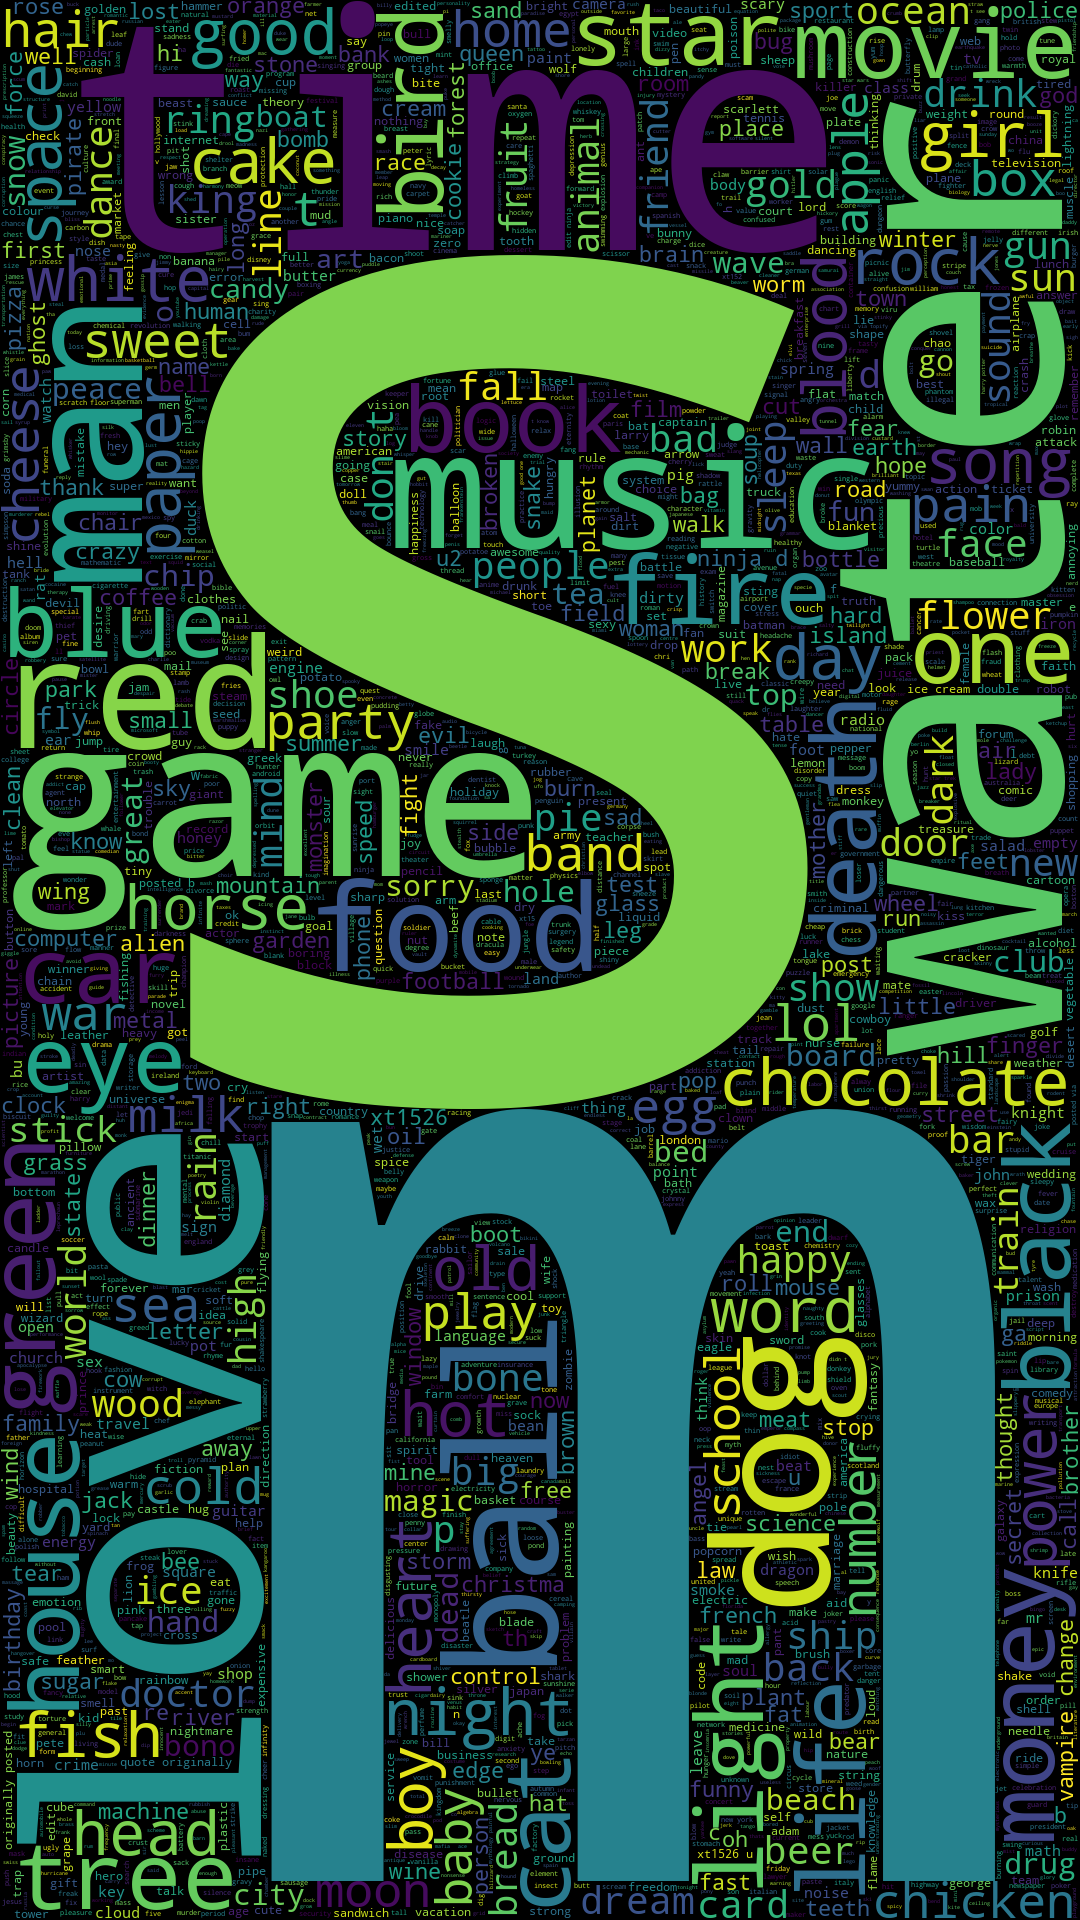

In [23]:
from wordcloud import WordCloud

long_string = ','.join(list(data['word2'].values))

wordcloud = WordCloud(background_color="black", width=1080, height=1920, max_words=100000, random_state=24)
wordcloud.generate(long_string)
wordcloud.to_image()